<h4 align = "right"> Theerawat Jindapoo </h4>

# <center> Movie Industry Analysis in 2019 </center>

## Objective

#### The objective of this project is to analyze movie industry in 2019 for companies that want to sponsor in movies. The project will analyze in overall view and also small details to make is information benefits companies the most.

## Data Mining

In [238]:
import requests
import csv
from bs4 import BeautifulSoup
from IPython.display import Image
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from pylab import rcParams
import seaborn as sns

#### First, I used BeautifulSoup to extract informations for the website.

In [2]:
movie = requests.get("https://www.the-numbers.com/market/2019/top-grossing-movies")

In [279]:
data = BeautifulSoup(movie.content, "lxml")

In [280]:
print(movie.status_code)

200


In [282]:
text = data.text

In [283]:
type(text)

str

In [284]:
len(text)

56610

#### Here I extracted description of the table from the website.

In [22]:
print(text[text.find("Annual Movie Chart - 2019")+len("Annual Movie Chart - 2019"):text.find("See Top 2019 Movies")])



← 20182020 →


Note: This chart ranks movies by the amount they earned during 2019.
It includes movies released in previous years that earned money during 2019.
For example, a movie released over Thanksgiving in 2018 will most likely earn money in 2018 and 2019.
Click on the individual movie to see its total gross over all the years in which it played.
Each box office year ends on the first Sunday of the following year.
The next year starts the following day (Monday).
For example, the "2004 box office year" ended on Sunday, January 2, 2005.
Inflation-adjusted figures are based on ticket sale estimates.




#### Then, I tried to display the logo of the website but you can see that in 'src', it was not a full link of the photo, it didn't start with https://. So, I need to place 'https://www.the-numbers.com' before that manually.

In [23]:
logo = data.find_all("img", {"src": "/images/the-numbers-banner.png"})

In [24]:
logo

[<img alt="The Numbers - Where Data and Movies Meet" border="0" height="67" src="/images/the-numbers-banner.png" width="524"/>]

In [26]:
logo[0]['src']

'/images/the-numbers-banner.png'

In [36]:
logo_url = ('https://www.the-numbers.com/images/the-numbers-banner.png')

In [37]:
display(Image(url=logo_url))

#### Then I started to extract the table and I saw that it had only 1 table

In [39]:
len(data.find_all("table"))

1

In [294]:
table = data.find("table")

In [295]:
table_df = table.find_all('tr')

In [296]:
ta = []
for x in table_df:
    td = x.find_all('td')
    ap = [x.text for x in td]
    ta.append(ap)

#### In the table, 'tr' is each row and 'td' is each detail in that row, so I used loop to extract all details out and create dataframe

In [297]:
df = pd.DataFrame(ta, columns = ["Rank", "Movie", "Release_Date", "Distributor", "Genre", "Gross", "Tickets_Sold"])

In [299]:
df.head()

,Rank,Movie,Release_Date,Distributor,Genre,Gross,Tickets_Sold
0,None,None,None,None,None,None,None
1,1,Avengers: Endgame,"Apr 26, 2019",Walt Disney,Action,"$858,373,000","94,223,161"
2,2,The Lion King,"Jul 19, 2019",Walt Disney,Adventure,"$543,638,043","59,674,868"
3,3,Star Wars: The Rise of Skyw…,"Dec 20, 2019",Walt Disney,Adventure,"$451,582,256","49,569,951"
4,4,Frozen II,"Nov 22, 2019",Walt Disney,Adventure,"$450,439,533","49,444,515"


In [300]:
df = df.dropna()

#### Here I want to see how many Distributor it have in this data and how many record per distributor. Turn out that there are 129 distributors in this data, which are a lot.

In [301]:
df["Distributor"].value_counts()

Warner Bros.          43
Universal             26
Sony Pictures         24
Well Go USA           23
IFC Films             23
                      ..
Super LTD              1
Santa Rita Film Co     1
Arthur Davis Asso…     1
International Fil…     1
                       1
Name: Distributor, Length: 129, dtype: int64

In [302]:
len(df["Distributor"].value_counts())

129

#### Then, I select only top10 (I didn't have to sort in because the website already ranked it)

In [303]:
top = df.iloc[:10]
top

,Rank,Movie,Release_Date,Distributor,Genre,Gross,Tickets_Sold
1,1,Avengers: Endgame,"Apr 26, 2019",Walt Disney,Action,"$858,373,000","94,223,161"
2,2,The Lion King,"Jul 19, 2019",Walt Disney,Adventure,"$543,638,043","59,674,868"
3,3,Star Wars: The Rise of Skyw…,"Dec 20, 2019",Walt Disney,Adventure,"$451,582,256","49,569,951"
4,4,Frozen II,"Nov 22, 2019",Walt Disney,Adventure,"$450,439,533","49,444,515"
5,5,Toy Story 4,"Jun 21, 2019",Walt Disney,Adventure,"$434,038,008","47,644,128"
6,6,Captain Marvel,"Mar 8, 2019",Walt Disney,Action,"$426,829,839","46,852,891"
7,7,Spider-Man: Far From Home,"Jul 2, 2019",Sony Pictures,Action,"$390,532,085","42,868,505"
8,8,Aladdin,"May 24, 2019",Walt Disney,Adventure,"$355,559,216","39,029,552"
9,9,Joker,"Oct 4, 2019",Warner Bros.,Thriller/Suspense,"$333,985,454","36,661,410"
10,10,Jumanji: The Next Level,"Dec 13, 2019",Sony Pictures,Adventure,"$235,933,751","25,898,326"


#### From top 10 movies that earned the most gross income in 2019, 7 out of 10 are Walt Disney's movies, 2 out of 10 are Sony's movies and 1 out of 10 is Warner Bros's movie.

In [304]:
top["Distributor"].value_counts()

Walt Disney      7
Sony Pictures    2
Warner Bros.     1
Name: Distributor, dtype: int64

In [305]:
top.groupby(["Genre"]).sum()

,Rank,Movie,Release_Date,Distributor,Gross,Tickets_Sold
Genre,,,,,,
Action,167,Avengers: EndgameCaptain MarvelSpider-Man: Far...,"Apr 26, 2019Mar 8, 2019Jul 2, 2019",Walt DisneyWalt DisneySony Pictures,"$858,373,000$426,829,839$390,532,085","94,223,16146,852,89142,868,505"
Adventure,2345810,The Lion KingStar Wars: The Rise of Skyw…Froze...,"Jul 19, 2019Dec 20, 2019Nov 22, 2019Jun 21, 20...",Walt DisneyWalt DisneyWalt DisneyWalt DisneyWa...,"$543,638,043$451,582,256$450,439,533$434,038,0...","59,674,86849,569,95149,444,51547,644,12839,029..."
Thriller/Suspense,9,Joker,"Oct 4, 2019",Warner Bros.,"$333,985,454","36,661,410"


####  When I tried to sum it by Genre, there was a problem. Gross and Tickets_Sold were not integer, so I need to change them into integer.

In [306]:
df[df.columns[5:]] = df[df.columns[5:]].apply(lambda x: x.str.replace('$','')).apply(lambda x: x.str.replace(',','')).astype(np.int64)

In [308]:
df.head()

,Rank,Movie,Release_Date,Distributor,Genre,Gross,Tickets_Sold
1,1,Avengers: Endgame,"Apr 26, 2019",Walt Disney,Action,858373000,94223161
2,2,The Lion King,"Jul 19, 2019",Walt Disney,Adventure,543638043,59674868
3,3,Star Wars: The Rise of Skyw…,"Dec 20, 2019",Walt Disney,Adventure,451582256,49569951
4,4,Frozen II,"Nov 22, 2019",Walt Disney,Adventure,450439533,49444515
5,5,Toy Story 4,"Jun 21, 2019",Walt Disney,Adventure,434038008,47644128


#### I stored every disney informations into 'disney' variable.

In [309]:
disney = df[df["Distributor"] == "Walt Disney"]

In [310]:
disney.head()

,Rank,Movie,Release_Date,Distributor,Genre,Gross,Tickets_Sold
1,1,Avengers: Endgame,"Apr 26, 2019",Walt Disney,Action,858373000,94223161
2,2,The Lion King,"Jul 19, 2019",Walt Disney,Adventure,543638043,59674868
3,3,Star Wars: The Rise of Skyw…,"Dec 20, 2019",Walt Disney,Adventure,451582256,49569951
4,4,Frozen II,"Nov 22, 2019",Walt Disney,Adventure,450439533,49444515
5,5,Toy Story 4,"Jun 21, 2019",Walt Disney,Adventure,434038008,47644128


#### Also with Universal

In [311]:
universal = df[df["Distributor"] == "Universal"]
universal.head()

,Rank,Movie,Release_Date,Distributor,Genre,Gross,Tickets_Sold
12,12,Us,"Mar 22, 2019",Universal,Thriller/Suspense,175084580,19218944
13,13,Fast & Furious Presents: Ho…,"Aug 2, 2019",Universal,Action,173956935,19095163
15,15,How to Train Your Dragon: T…,"Feb 22, 2019",Universal,Adventure,160799505,17650879
16,16,The Secret Life of Pets 2,"Jun 7, 2019",Universal,Adventure,158874395,17439560
24,24,Glass,"Jan 18, 2019",Universal,Thriller/Suspense,111048468,12189733


In [312]:
money = df[["Distributor", "Gross"]]

#### Then I want to see top 5 Distributors that made the most gross income in 2019.

In [314]:
money_sum = money.groupby(['Distributor']).sum()
money_sum = money_sum.sort_values(by = ['Gross'], ascending = False)
money_sum.head(5)

,Gross
Distributor,
Walt Disney,3803611686
Warner Bros.,1574147220
Sony Pictures,1374824330
Universal,1308647371
Lionsgate,797851162


#### I also want to see top 5 Genre that made the most gross income in 2019.

In [315]:
genre = df[["Genre", "Gross"]]
genre_sum = genre.groupby(['Genre']).sum()
genre_sum = genre_sum.sort_values(by = ['Gross'], ascending = False)
genre_sum.head(5)

,Gross
Genre,
Adventure,3931621099
Action,2897574987
Drama,1372163852
Thriller/Suspense,1189869794
Horror,748242329


## TOP 10 Distributors by Gross Income

In [316]:
money_plt = money_sum.iloc[:10]
money_plt = money_plt.reset_index()
money_plt.head(5)

,Distributor,Gross
0,Walt Disney,3803611686
1,Warner Bros.,1574147220
2,Sony Pictures,1374824330
3,Universal,1308647371
4,Lionsgate,797851162


Text(0.5, 1.0, 'Top 10 Distributor by Gross Income')

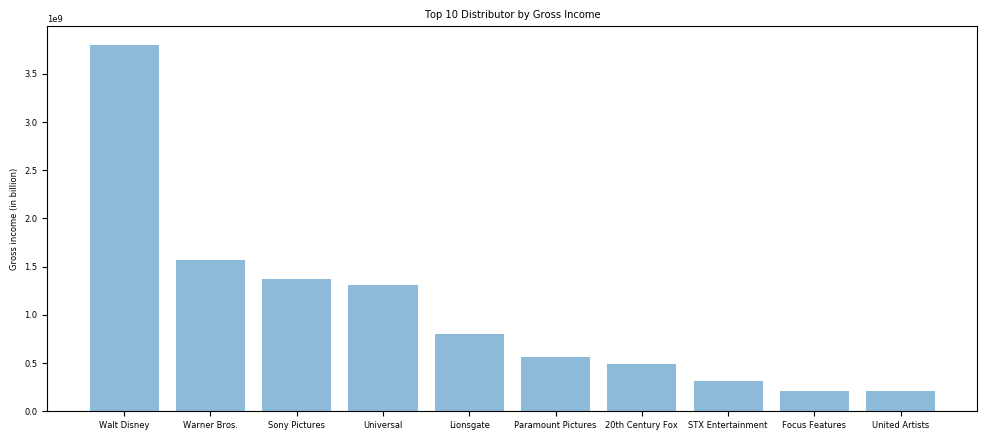

In [318]:
rcParams['figure.figsize'] = 12, 5
plt.rcParams.update({'font.size': 6})
plt.bar(money_plt['Distributor'], money_plt['Gross'], align = 'center', alpha = 0.5)
plt.ylabel('Gross income (in billion)')
plt.title('Top 10 Distributor by Gross Income')

#### Walt Disney Gross Income was the highest, even about 100% higher than the second distributor.

## Top 5 Distributors in Pie Chart

In [186]:
top5 = money_plt.iloc[:5]
top5['Percent'] = top5.Gross/top5.Gross.sum()*100
top5

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Distributor,Gross,Percent
0,Walt Disney,3803611686,42.934604
1,Warner Bros.,1574147220,17.768740
2,Sony Pictures,1374824330,15.518813
3,Universal,1308647371,14.771817
4,Lionsgate,797851162,9.006025


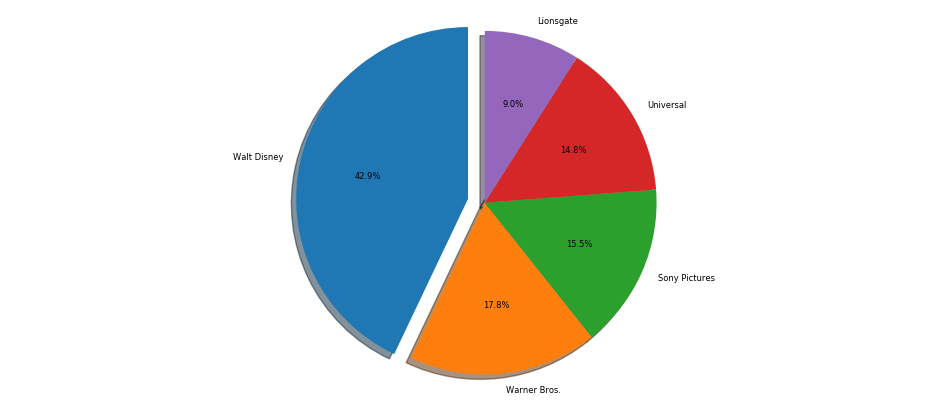

In [190]:
pie_label = list(top5['Distributor'])
pie_size = list(top5['Percent'])
sep = (0.1,0,0,0,0)

fig1, ax1 = plt.subplots()
ax1.pie(pie_size, explode = sep, labels = pie_label, autopct = '%1.1f%%', shadow = True, startangle = 90)
ax1.axis('equal')
plt.show()

#### Walt Disney dominated over 40 percentage of top 5 distributors's gross income in 2019.

## Scatter plot of Gross Income by Genre in 2019.

In [319]:
genre_avg = genre.groupby(['Genre']).mean()
genre_avg = genre_avg.dropna()
genre_avg = genre_avg.reset_index()
genre_avg.head(5)

,Genre,Gross
0,,2.910700e+04
1,Action,5.268318e+07
2,Adventure,8.023717e+07
3,Black Comedy,1.919953e+07
4,Comedy,1.242642e+07


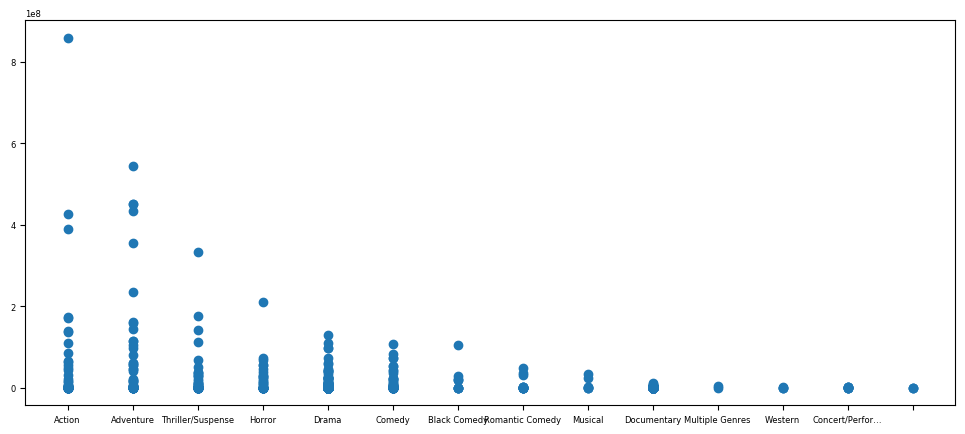

In [320]:
plt.scatter(list(genre['Genre']), list(genre['Gross']))

#### The highest gross income in 2019 was Action movie. However, if we look at average, Adventure films did better than action films in total.

In [321]:
action = df[df.Genre == 'Action']
action = action[['Distributor','Gross']]
action_avg = action.groupby(['Distributor']).mean()
action_avg = action_avg.sort_values(by = ['Gross'], ascending = False)
action_avg = action_avg.iloc[:10]
action_avg = action_avg.reset_index()

In [322]:
action_min = action.groupby('Distributor').min()
action_max = action.groupby('Distributor').max()

In [323]:
action_minmax = pd.DataFrame(columns = ['Distributor','min','max'])

In [324]:
action_minmax['Distributor'] = action_min.index
action_minmax['min'] = list(action_min['Gross'])
action_minmax['max'] = list(action_max['Gross'])
action_minmax = action_minmax.sort_values(by = ['min'], ascending = False)
action_minmax = action_minmax.iloc[:10]
action_minmax

,Distributor,min,max
20,Walt Disney,426829839,858373000
13,Paramount Pictures,48546770,62253077
6,FUNimation,30376755,30376755
16,Self Distributed,5875487,5875487
19,Viva Entertainment,2684911,2684911
21,Warner Bros.,2013136,140371656
18,Universal,1056865,173956935
11,Magnolia Pictures,847495,847495
23,Yash Raj Films,535000,3640355
14,Reliance Entertai…,461863,986339


#### The minimum and maximum of Walt Disney's action films were more than the second distributor by digit.

## Min and Max Gross Income in action movies by Distributors.

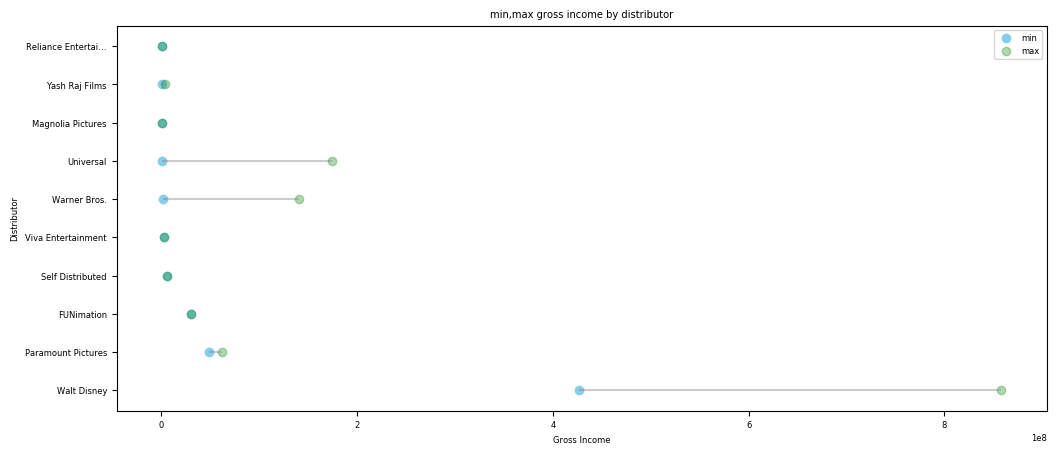

In [325]:
m_range = range(1,len(action_minmax.index)+1)
plt.hlines(y = m_range, xmin = list(action_minmax['min']), xmax = list(action_minmax['max']), color = 'grey', alpha = 0.4)
plt.scatter(list(action_minmax['min']), m_range, color = 'skyblue', alpha = 1, label = 'min')
plt.scatter(list(action_minmax['max']), m_range, color = 'green', alpha = 0.3, label = 'max')
plt.legend()

plt.yticks(m_range, list(action_minmax['Distributor']))
plt.title("min,max gross income by distributor")
plt.xlabel("Gross Income")
plt.ylabel("Distributor")
plt.show()

#### Walt Disney clearly dominated in Action films in 2019.

In [272]:
disney1 = disney[['Genre','Gross']]

In [273]:
disney_min = disney1.groupby('Genre').min()
disney_max = disney1.groupby('Genre').max()

In [276]:
disney2 = pd.DataFrame(columns = ['Genre','min','max'])
disney2['Genre'] = disney_min.index
disney2['min'] = list(disney_min['Gross'])
disney2['max'] = list(disney_max['Gross'])
disney2 = disney2.sort_values(by = ['min'], ascending = False)
disney2

,Genre,min,max
0,Action,426829839,858373000
3,Musical,33141176,33141176
2,Documentary,7699452,7699452
1,Adventure,73093,543638043


## Min and Max Gross Income by Genre of Walt Disney's movies in 2019.

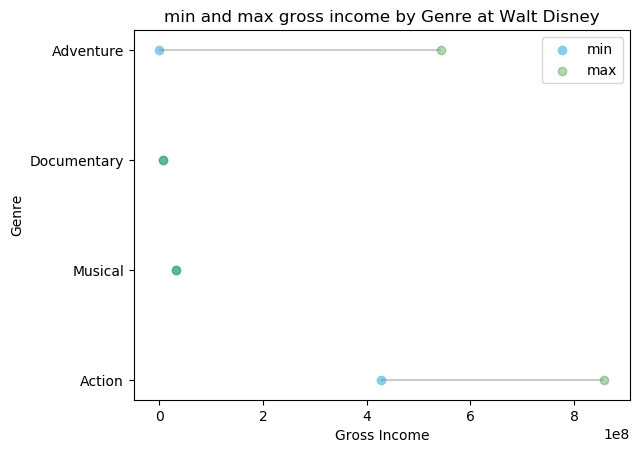

In [277]:
m_range = range(1,len(disney2.index)+1)
plt.hlines(y = m_range, xmin = list(disney2['min']), xmax = list(disney2['max']), color = 'grey', alpha = 0.4)
plt.scatter(list(disney2['min']), m_range, color = 'skyblue', alpha = 1, label = 'min')
plt.scatter(list(disney2['max']), m_range, color = 'green', alpha = 0.3, label = 'max')
plt.legend()

plt.yticks(m_range, list(disney2['Genre']))
plt.title("min and max gross income by Genre at Walt Disney")
plt.xlabel("Gross Income")
plt.ylabel("Genre")
plt.show()

#### Walt Disney did great in Adventure and Action films but not so good in Documentary and Musical films.

## Findings

From this analysis, we can see that Walt Disney dominated in movie industry. It have the highest amount of movie in 2019 and also highest gross income movie is from Walt Disney. In top 10, Walt Disney has 7 out of it. Even in top 5 distributors by gross incomes, Walt Disney has overall 40 percentage of the gross income from that top 5. The second place is Warner Bros. which has only about 18 percentage. To see in the clear picture, the first graph shows how clearly Walt Disney dominated is market. 
 
For Genre perspective, Adventure and Action have the highest gross income from all genres. From the second graph (scatter plot), we can see that Action, Adventure and Thriller are top 3 of gross income by genre. So I decided to analyze more into action movies.
 
In action movies, we can see from the fourth graph that Walt Disney also dominated in action films, it earned above 4 billion dollar at minimum and over 8 billion dollar at maximum when action movies from Universal and Warner Bros. didn't even go pass 2 billion dollar. So I decided to look at each genre gross income of Walt Disney film.
the last graph show that Walt Disney did not do well in Documentary and Musical films but in Adventure and Action films, they did it very well.

## Recommendations

For companies that looking to sponsor movies and want people to see their advertisement the most, I recommend to focus on Walt Disney movies that are Action films or Adventure films. However, if the price is too high and not worth it, I also recommend Warn Bros., Sony Pictures and Universal. Also, I recommend to try to focus on Action films, Adventure films and Thriller/Suspense films.